In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
df = pd.read_csv(r'C:\Users\Yuvaraj\OneDrive\Project4\.venv\kidney_disease.csv')

In [5]:
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.shape

(400, 26)

In [8]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [9]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(158, 26)

In [12]:
df.drop('id', axis = 1, inplace= True)

In [13]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [15]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int32  
 16  wc              158 non-null    int32  
 17  rc              158 non-null    flo

In [16]:
obj_dt = df.select_dtypes(include = 'object')
obj_dt.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes,ckd
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no,ckd
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no,ckd
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes,ckd


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in obj_dt.columns:
  df[i] = le.fit_transform(df[i])

In [18]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29,12100,3.7,1,1,0,1,0,1,0
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32,4500,3.8,1,1,0,1,1,0,0
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16,11000,2.6,1,1,1,1,1,0,0
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,24,9200,3.2,1,1,1,1,1,1,0


In [19]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,1,1,1,0
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29,12100,3.7,1,1,0,1,0,1,0
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32,4500,3.8,1,1,0,1,1,0,0
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16,11000,2.6,1,1,1,1,1,0,0
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,24,9200,3.2,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47,6700,4.9,0,0,0,0,0,0,1
154,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54,7800,6.2,0,0,0,0,0,0,1
155,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49,6600,5.4,0,0,0,0,0,0,1
156,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51,7200,5.9,0,0,0,0,0,0,1


In [20]:
df.replace({'classification':{'ckd\t':'ckd',0:1,1:0}},inplace=True)

<Axes: >

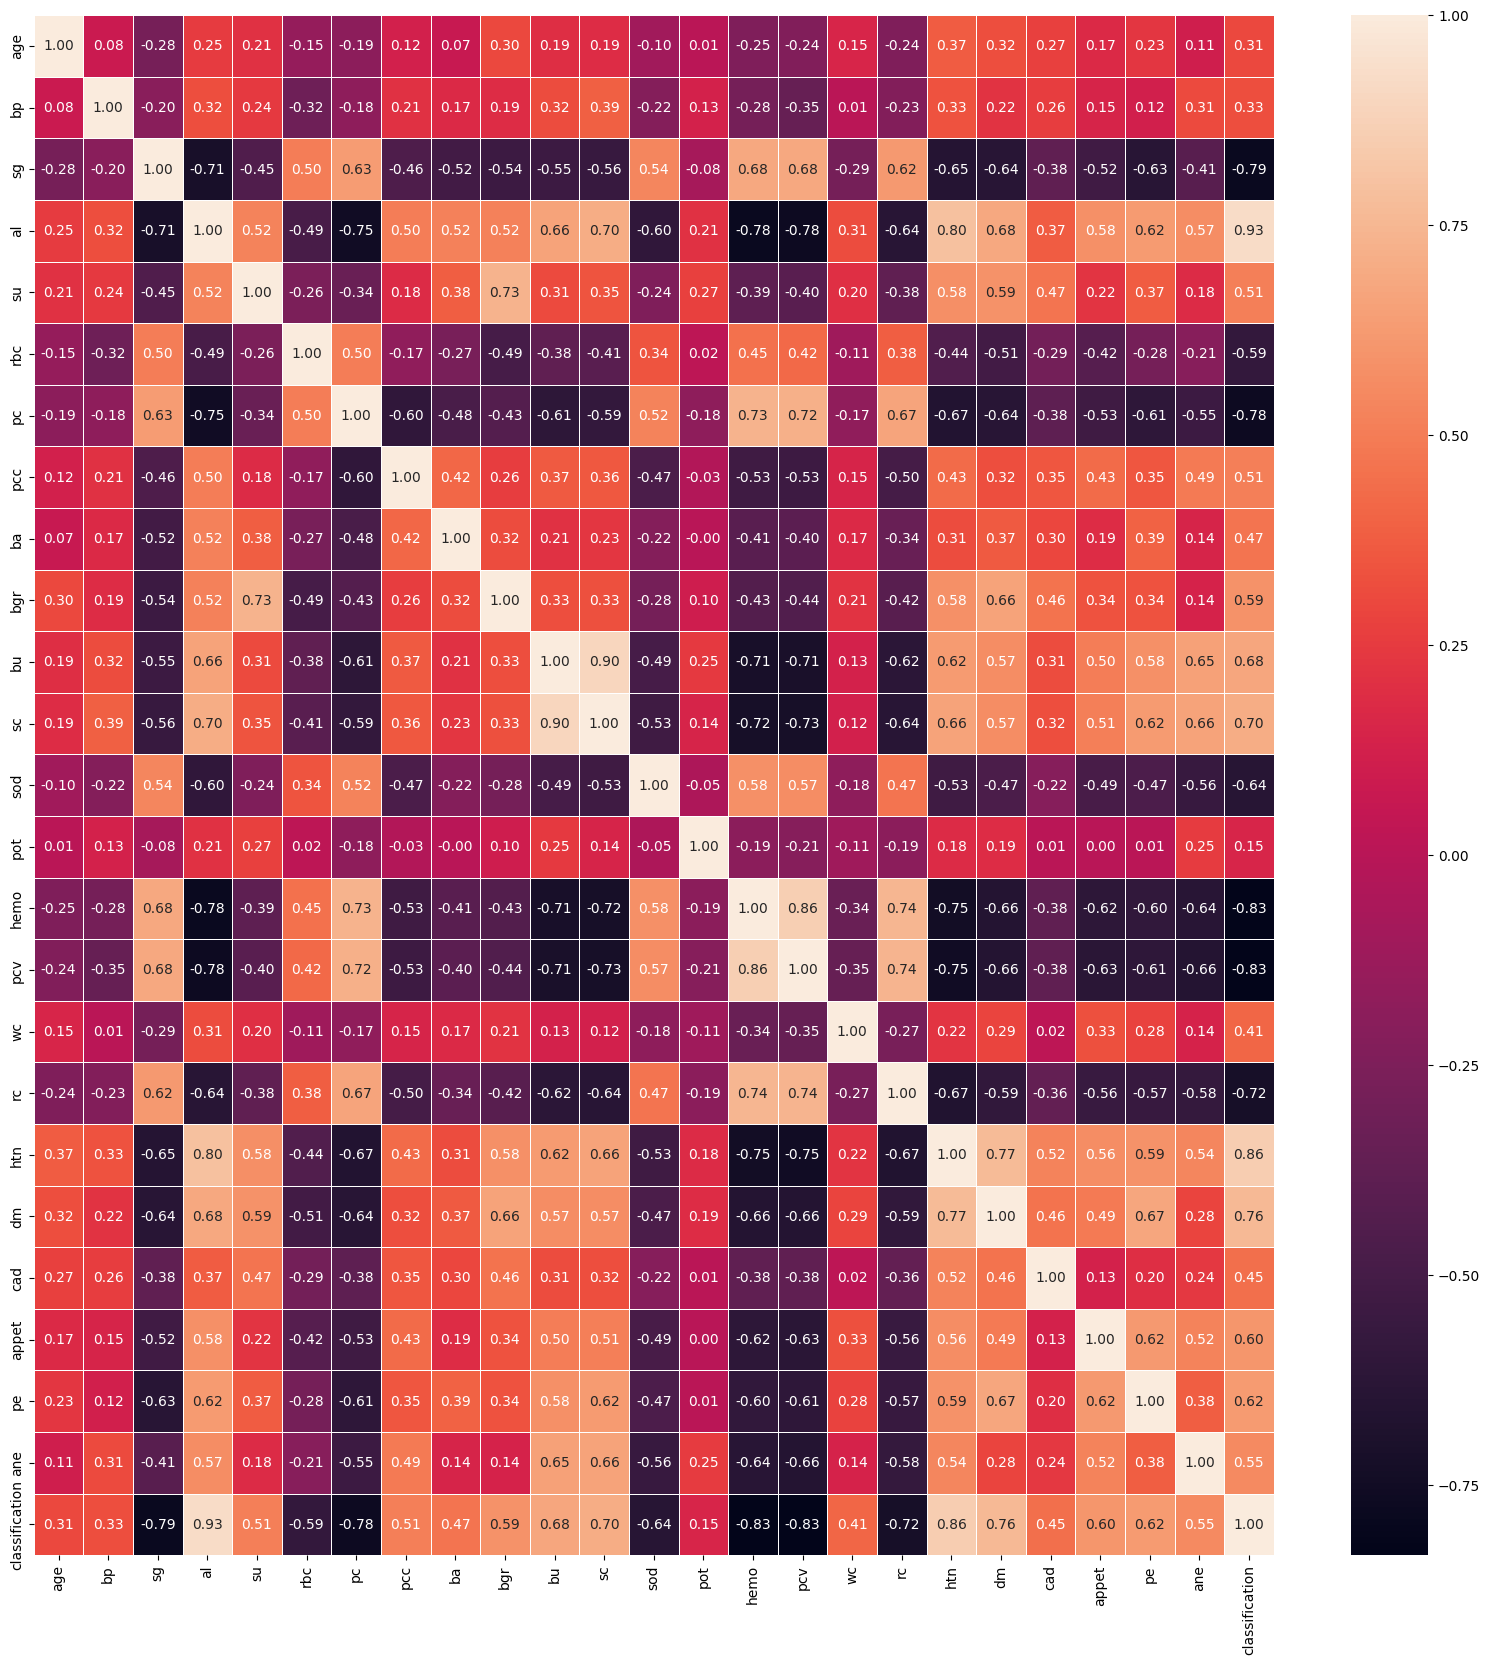

In [21]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [22]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.079712,-0.277303,0.253380,0.207711,-0.147971,-0.188907,0.124032,0.068353,0.301915,...,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,-0.316670,-0.179834,0.206507,0.174555,0.190113,...,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,0.145047,0.117878,0.311097,0.326567
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,0.500494,0.630323,-0.460050,-0.516392,-0.544781,...,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,-0.523944,-0.633622,-0.413252,-0.790102
al,0.253380,0.322507,-0.712331,1.000000,0.521448,-0.489941,-0.752956,0.503341,0.516104,0.518123,...,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,-0.448477,0.521448,1.000000,-0.256568,-0.335901,0.177327,0.381929,0.730050,...,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,0.220547,0.374128,0.179811,0.510615
rbc,-0.147971,-0.316670,0.500494,-0.489941,-0.256568,1.000000,0.498959,-0.168592,-0.273177,-0.493857,...,0.422537,-0.108857,0.379378,-0.442400,-0.511777,-0.293269,-0.418639,-0.282868,-0.209797,-0.586391
pc,-0.188907,-0.179834,0.630323,-0.752956,-0.335901,0.498959,1.000000,-0.600092,-0.481227,-0.430646,...,0.718042,-0.169936,0.667113,-0.666767,-0.636288,-0.384223,-0.528435,-0.606234,-0.545380,-0.775388
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,-0.168592,-0.600092,1.000000,0.415033,0.257768,...,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,-0.273177,-0.481227,0.415033,1.000000,0.318095,...,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,-0.493857,-0.430646,0.257768,0.318095,1.000000,...,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,0.338924,0.336141,0.139854,0.591217


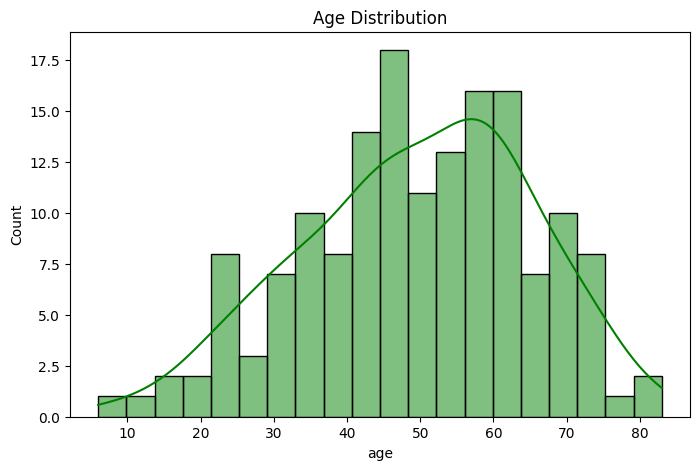

In [ ]:
#EDA
#  Distribution of Age (Histogram)

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='green')
plt.title('Age Distribution')
plt.show()

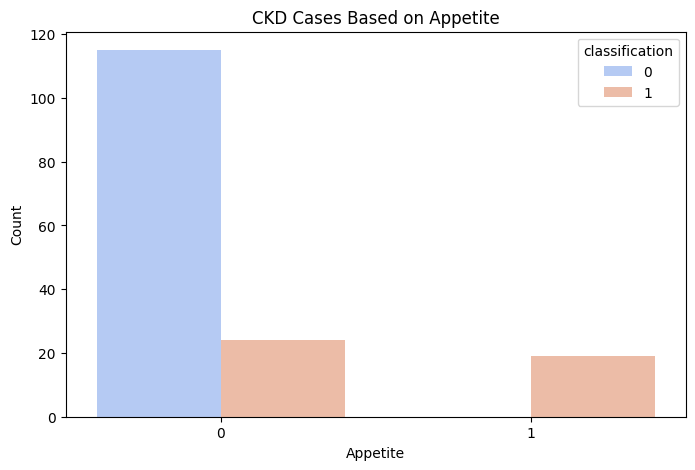

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['appet'], hue=df['classification'], palette='coolwarm')
plt.title("CKD Cases Based on Appetite")
plt.xlabel("Appetite")
plt.ylabel("Count")
plt.show()

In [28]:
x=df.drop(['classification','pcv','hemo','sod'],axis=1)
y=df['classification']

In [29]:
print(x)

      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   sc  pot  \
0    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  3.8  2.5   
1    53.0  90.0  1.020  2.0  0.0    0   0    1   0   70.0  ...  7.2  3.7   
2    63.0  70.0  1.010  3.0  0.0    0   0    1   0  380.0  ...  2.7  4.2   
3    68.0  80.0  1.010  3.0  2.0    1   0    1   1  157.0  ...  4.1  6.4   
4    61.0  80.0  1.015  2.0  0.0    0   0    0   0  173.0  ...  3.9  5.2   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...  ...  ...   
153  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...  0.5  4.9   
154  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...  1.2  3.5   
155  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...  0.6  4.4   
156  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...  1.0  4.9   
157  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0  ...  1.1  3.5   

        wc   rc  htn  dm  cad  appet  pe  ane  
0     6700  3.9    1   0    0      1   

In [30]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
153    0
154    0
155    0
156    0
157    0
Name: classification, Length: 158, dtype: int32


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((126, 21), (32, 21), (126,), (32,))

In [32]:
model=RandomForestClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



<Axes: >

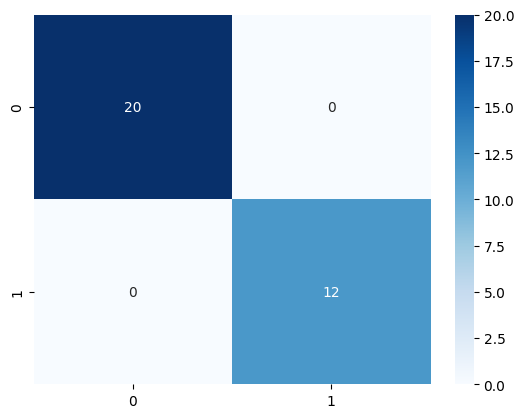

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

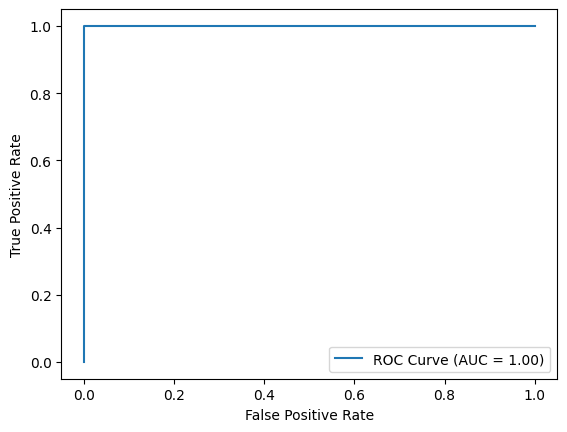

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_prob = model.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  
roc_auc = auc(fpr, tpr)                        
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier().fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [36]:
#Logistic Regression
model3=LogisticRegression().fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Users\Yuvaraj\OneDrive\Project4\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#KN Neighbors

from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       1.00      0.17      0.29        12

    accuracy                           0.69        32
   macro avg       0.83      0.58      0.54        32
weighted avg       0.79      0.69      0.61        32



In [38]:
input = (48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,2.5,6700,3.9,1,0,0,1,1,1)

In [39]:
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)

In [46]:
# Make prediction
kd_prediction = model.predict(input_reshaped)
print("Model Output:", kd_prediction)

# Interpretation
if kd_prediction[0] == 0:
    print("The Person does NOT have chronic kidney disease.")
else:
    print("The Person has chronic kidney disease.")


Model Output: [1]
The Person has chronic kidney disease.


In [47]:
filename="kidney_disease_prediction.pkl"
pickle.dump(model,open(filename,'wb'))